# 0. Task

GOALS 1 ANSWER THESE QUESTIONS:
- Berapa banyak orang di tiap ras pada dataset ini? buat race column jadi index (v)
- Berapa average age of men? (v)
- What is the percentage of people who have a Bachelor's degree? (v)
- What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K? (v)
- What percentage of people without advanced education make more than 50K? (v)
- What is the minimum number of hours a person works per week? (v)
- What percentage of the people who work the minimum number of hours per week have a salary of more than 50K? (v)
- What country has the highest percentage of people that earn >50K and what is that percentage? (v)
- Identify the most popular occupation for those who earn >50K in India. (v)

GOALS 2 TRY TO BUILD SOME DASHBOARD ANALYSIS USING POWER BI UNTIL CAN GIVE SOME ADVICE POLICY OR SOMETHING GOOD INSIGHT

GOALS 3 TRY TO BUILD MACHINE LEARNING BASED ON BUSINESS UNDERSTANDING




# 1. Load Data

In [112]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [113]:
from ucimlrepo import fetch_ucirepo 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [114]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [115]:
df_main = pd.concat([X,y], axis=1)

In [116]:
df_main.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 2. Data Understanding

## 2.1 Short Output Data Understanding
- Berapa shape? (v)
- Struktur dan tipe data kolom nya gimana? (v)

- Ada data null? distribusi masing masing kolom nya gimana? (v)
- Ada data duplikat? (v)

- Target variable nya gimana? distribusi nya balance atau ngga? (v)

- Ada outlier? (v)

In [117]:
# struktur dan tipe data kolom

df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [118]:
# shape data

df_main.shape

(48842, 15)

In [119]:
# cek duplikat pada data

df_main.duplicated().sum()

np.int64(29)

In [120]:
# cek kolom yang ada missing value

df_main.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

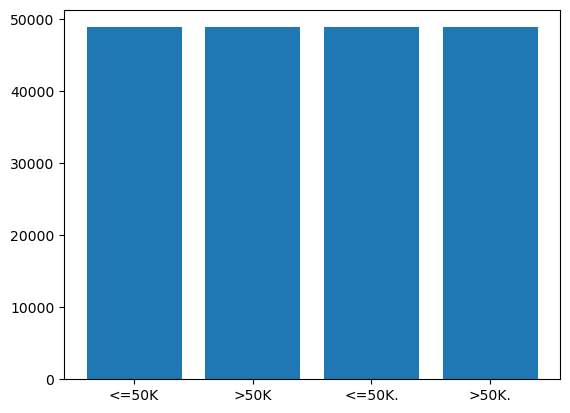

In [121]:
# documentation how to create bar plot using matplotlib
# matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)

plt.bar(df_main['income'], df_main['income'].count(), width=0.8)
plt.show()

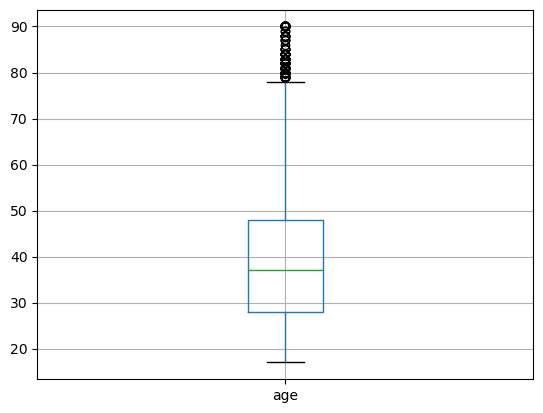

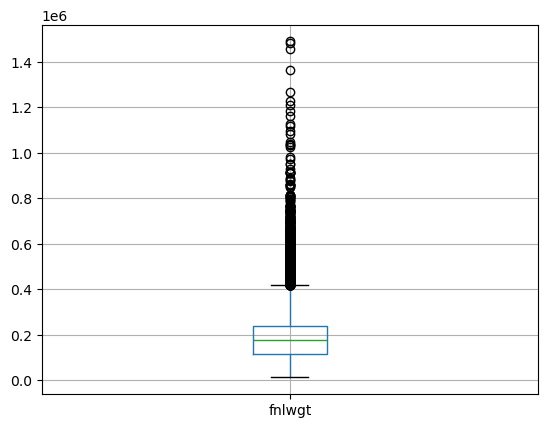

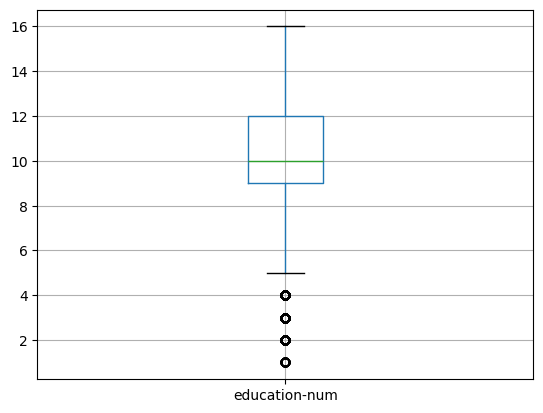

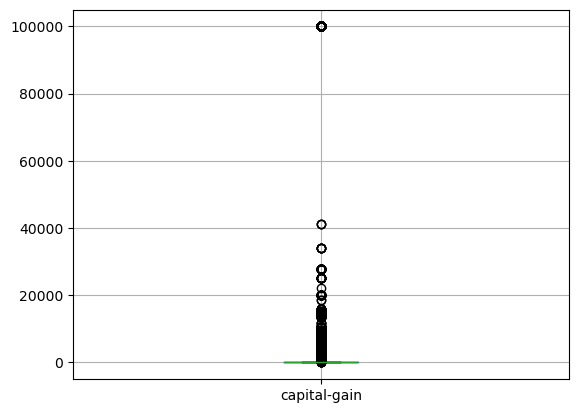

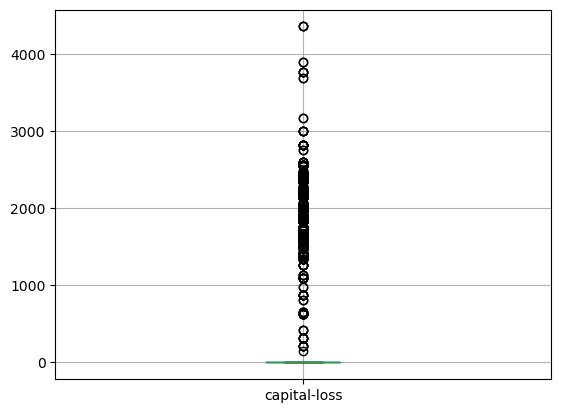

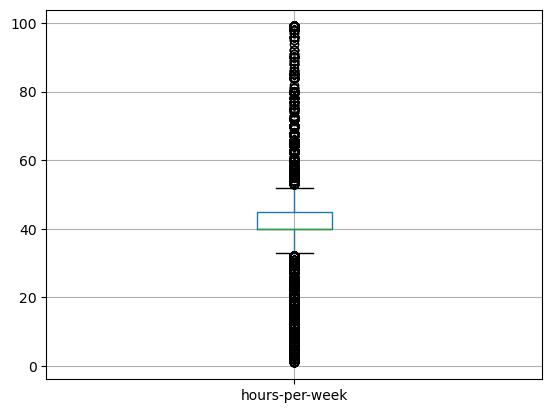

In [122]:
# Cek Outlier
# documentation how to create box plot using matplotlib
# matplotlib.pyplot.boxplot(x, notch=False, vert=True, patch_artist=False, widths=0.5, meanline=False, showmeans=False, showcaps=True, showbox=True, showfliers=True, boxprops=None, whiskerprops=None, capprops=None, flierprops=None, medianprops=None, meanprops=None, manage_ticks=True, autorange=False, zorder=2, *, data=None)

num_cols = df_main.select_dtypes(include=np.number).columns.tolist()

for i in range(len(num_cols)):
    df_main.boxplot(column=num_cols[i])
    plt.show()

Summary :
- Tipe data sudah sesuai
- ada duplikat --> di drop aja
- ada null --> di liat dulu sebaran data nya (normal fill mean, skew fill median)
- label dah setara
- outlier banyak
- nama kolom fnlwgt ubah jadi final_weight

## 2.2 Many Output Data Understanding
- Values pada masing masing kolom gimana? untuk categorical di cek ada values apa saja, tapi kalau numerical di cek min dan max nya masuk akal atau tidak.

In [123]:
# cek dulu nama kolomnya

df_main.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [124]:
# cek keanehan data age, pakai base knowledge manusia normalnya umur ... belum tau konteks data nya

print('Umur terendah :',df_main['age'].min())
print('Umur tertinggi :',df_main['age'].max())

Umur terendah : 17
Umur tertinggi : 90


In [125]:
# Cek ada yang bisa di kelompokkan ulang ga?

df_main['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [126]:
# Cek apakah ada yang bisa di rename kategori nya sehingga lebih understandable

df_main['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [127]:
# Cek masuk akal tidak education number nya

print('education num terendah :',df_main['education-num'].min())
print('education num tertinggi :',df_main['education-num'].max())

education num terendah : 1
education num tertinggi : 16


In [128]:
# Cek bagaimana kategori marital-status, bisa lebih di sederhanakan ga?

df_main['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [129]:
# Cek bagaimana kategori occupation, bisa lebih di sederhanakan ga?

df_main['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)

In [130]:
# Cek bagaimana kategori relationship, bisa lebih di sederhanakan ga?

df_main['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [131]:
# Cek bagaimana kategori race nya apakah bisa di sederhanakan ga?

df_main['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [132]:
# Cek bagaimana kategori sex nya

df_main['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [133]:
# Cek ada data yang ga masuk akal tidak?

print('capital-gain terendah :',df_main['capital-gain'].min())
print('capital-gain tertinggi :',df_main['capital-gain'].max())

capital-gain terendah : 0
capital-gain tertinggi : 99999


In [134]:
# Cek ada data yang ga masuk akal tidak?

print('capital-loss terendah :',df_main['capital-loss'].min())
print('capital-loss tertinggi :',df_main['capital-loss'].max())

capital-loss terendah : 0
capital-loss tertinggi : 4356


In [135]:
# Cek ada data yang ga masuk akal tidak?

print('hours-per-week terendah :',df_main['hours-per-week'].min())
print('hours-per-week tertinggi :',df_main['hours-per-week'].max())

hours-per-week terendah : 1
hours-per-week tertinggi : 99


In [136]:
# Cek ada data apa saja di kolom native-country

df_main['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands', nan], dtype=object)

In [137]:
# Cek ada kesalahan data ga?

df_main['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

Summary Data Quality:
- Secara global, umur yang dinilai produktif adalah 15-65 tahun, maka >65 tahun perlu di analisa lebih lanjut
- Workclass itu harus di pelajari lebih lanjut aturannya
- Education harus di kelompokin ulang sih karena kayak terlalu bertele tele
- Education num juga harus di pelajari lebih jauh dulu
- Martial-status ada beberapa istilah yang aneh
- Occupation kayaknya yaudah dibiarin aja sih keknya
- Relationship kayaknya bisa di ringkasin lagi
- Race kayaknya juga bisa lebih di ringkasin lagi
- Sex sudah tidak ada masalah sih harusnya
- Capital - gain perlu dipertanyakan ada yang aneh dari max nya
- Capital - loss perlu dipelajari lebih lanjut possible ga loss segitu
- Hours - per week perlu di cek lebih lanjut sih, kalau cari di internet normalnya ada di rentang 36-50 jam
- Native country ada nama values yang aneh
- Income ada kesalahan ketik nama values

Business Understanding Related to the Data

Jadi ini itu data sensus yang menggambarkan kondisi wilayah tertentu

# 3. Answer The Question

In [138]:
# Berapa banyak orang di tiap ras pada dataset ini? buat race column jadi index?

df_race = df_main.groupby('race', as_index=True)['age'].count()
df_race

race
Amer-Indian-Eskimo      470
Asian-Pac-Islander     1519
Black                  4685
Other                   406
White                 41762
Name: age, dtype: int64

In [139]:
# Berapa average age of men?

average_all = df_main.groupby('sex')['age'].mean()
average_men = np.around(average_all['Male'], decimals=1)
print(average_men)

39.5


In [140]:
# What is the percentage of people who have a Bachelor's degree?

percentage_of_bachelors = np.around((df_main[df_main['education'] == 'Bachelors'].shape[0] / df_main.shape[0]) * 100, decimals=1)
print(percentage_of_bachelors)

16.4


In [141]:
# What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?

degree_more_50k_advanced = df_main[(df_main['education'].isin(['Bachelors', 'Masters', 'Doctorate'])) & ((df_main['income'] == '>50K') | (df_main['income'] == '>50K.'))]
precentage_degree_more_50K_advanced = np.around((degree_more_50k_advanced.shape[0] / df_main.shape[0]) * 100, decimals=1)
print(precentage_degree_more_50K_advanced)

10.7


In [142]:
# What percentage of people without advanced education (Bachelors, Masters, or Doctorate) make more than 50K?

degree_more_50k_non_advanced = df_main[~(df_main['education'].isin(['Bachelors', 'Masters', 'Doctorate'])) & ((df_main['income'] == '<=50K') | (df_main['income'] == '<=50K.'))]
precentage_degree_more_50K_non_advanced = np.around((degree_more_50k_non_advanced.shape[0] / df_main.shape[0]) * 100, decimals=1)
print(precentage_degree_more_50K_non_advanced)

63.6


In [143]:
# What is the minimum number of hours a person works per week?

minimum_hours_per_week = df_main['hours-per-week'].min()
print(minimum_hours_per_week)

1


In [144]:
# What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?

min_hours_more_50k = df_main[(df_main['hours-per-week'] == 1) & (df_main['income'].isin(['>50K', '>50K.']))]
percentage_min_hours_more_50k = np.around((min_hours_more_50k.shape[0] / df_main[df_main['hours-per-week'] == 1].shape[0]) * 100, decimals=1)
print(percentage_min_hours_more_50k)

11.1


In [145]:
# What country has the highest percentage of people that earn >50K and what is that percentage?
income_more_50K = df_main[(df_main['income'] == '>50K') | (df_main['income'] == '>50K.')]
country_more_50K = income_more_50K.groupby('native-country')[['income']].count()
name_highest_percentage_country = country_more_50K.idxmax().tolist()[0]

percentage_country_more_50K = np.around((country_more_50K.max() / country_more_50K.sum()) * 100, decimals=1).tolist()[0]
print(percentage_country_more_50K)
print(str(name_highest_percentage_country))

92.1
United-States


In [146]:
# Identify the most popular occupation for those who earn >50K in India.

df_india = df_main[df_main['native-country'] == 'India']
df_india_more_50k = df_india[(df_india['income'] == '>50K') | (df_india['income'] == '>50K.')]
occupation_india_more_50k = df_india_more_50k.groupby('occupation')['occupation'].count()
name_popular_occupation = occupation_india_more_50k.idxmax()
print(name_popular_occupation)

Prof-specialty


# 4. Data Preprocessing
Summary :
- Tipe data sudah sesuai
- ada duplikat --> di drop aja
- ada null di kolom --> di liat dulu sebaran data nya (normal fill mean, skew fill median) atau persentase dari total data barangkali bisa di drop
- label dah setara
- outlier banyak --> khawatir ada insight penting yasudah prefer using robust outlier model.
- nama kolom fnlwgt ubah jadi final_weight

Summary Data Quality:
- Secara global, umur yang dinilai produktif adalah 15-65 tahun, maka >65 tahun perlu di analisa lebih lanjut
- Workclass itu harus di pelajari lebih lanjut aturannya
- Education harus di kelompokin ulang sih karena kayak terlalu bertele tele
- Education num juga harus di pelajari lebih jauh dulu
- Martial-status ada beberapa istilah yang aneh
- Occupation kayaknya yaudah dibiarin aja sih keknya
- Relationship kayaknya bisa di ringkasin lagi
- Race kayaknya juga bisa lebih di ringkasin lagi
- Sex sudah tidak ada masalah sih harusnya
- Capital - gain perlu dipertanyakan ada yang aneh dari max nya
- Capital - loss perlu dipelajari lebih lanjut possible ga loss segitu
- Hours - per week perlu di cek lebih lanjut sih, kalau cari di internet normalnya ada di rentang 36-50 jam
- Native country ada nama values yang aneh
- Income ada kesalahan ketik nama values

## 4.1 Surface Data Quality Handling

In [147]:
df_changed = df_main.copy()

In [148]:
df_changed = df_changed.drop_duplicates()
df_changed.duplicated().sum()

np.int64(0)

In [149]:
df_changed = df_changed.rename(columns={'fnlwgt' : 'census-weight'})

In [150]:
df_changed.shape

(48813, 15)

In [151]:
# cek total data yang null dan "?" (possible di drop?)

df_changed[((df_changed['occupation'] == '?') | (df_changed['occupation'].isna()) & (df_changed['workclass'] == '?') | (df_changed['workclass'].isna()) & (df_changed['native-country'] == '?') | (df_changed['native-country'].isna()))].shape

(2117, 15)

In [152]:
# Pengubahan values untuk "?" pada setiap kolom menjadi others

df_changed = df_changed.replace('?', 'others')

In [153]:
# Karena kita ingin membantu membuat kebijakan bantuan, maka kolom label hanya akan memberikan bias ke model clustering nya, maka dari itu drop

df_changed = df_changed.drop(columns=['income'])

In [154]:
df_changed = df_changed.dropna()
df_changed.isna().sum()

age               0
workclass         0
census-weight     0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

## 4.2 Deeper Data Quality Handling (Outlier)

The goals is :
- We need to flagging for age that more than 65, because global fact said the productive age is around 15-65, so we need to separate into two categories in 'is_productive_age' (v)
- Because we seen on the boxplot there was a huge gap between the highest gain capital (approximately 50.000), so we need to do detail check for that condition (v)
- We dont do anything with capital loss because still make sense, gain 40 and loss 40. (v)
- Hours_per_week we did some IQR for values more than equal 55 hours, because on the internet the longest hour per week is on bhutan. Also its just for 54,5 hours. (v)
- Check is it any redundant features and drop if it any

In [155]:
# Creater new column for flagging age productive or not

df_changed['is_productive_age'] = df_changed['age'].apply(lambda x : 0 if x > 65 else 1)
df_changed[df_changed['is_productive_age'] == 0].head()

,age,workclass,census-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,is_productive_age
74,79,Private,124744,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0,0,20,United-States,0
77,67,others,212759,10th,6,Married-civ-spouse,others,Husband,White,Male,0,0,2,United-States,0
100,76,Private,124191,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,0
144,70,Private,105376,Some-college,10,Never-married,Tech-support,Other-relative,White,Male,0,0,40,United-States,0
157,71,Self-emp-not-inc,494223,Some-college,10,Separated,Sales,Unmarried,Black,Male,0,1816,2,United-States,0


In [156]:
# The condition of capital-gain more than 50K.

# 1. First check

df_changed[(df_changed['capital-gain'] > 50000)]


,age,workclass,census-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,is_productive_age
1246,54,Self-emp-inc,166459,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,1
1368,52,Private,152234,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,1
1482,53,Self-emp-inc,263925,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,1
1528,52,Private,118025,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,1
1616,46,Private,370119,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47739,32,Self-emp-inc,225053,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,60,United-States,1
48582,61,Self-emp-not-inc,151369,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,30,United-States,1
48591,36,Private,224566,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,99999,0,45,United-States,1
48598,42,Private,32878,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,42,United-States,1


In [157]:
# 2. Second check to make sure it is just error data

df_changed[(df_changed['capital-gain'] > 50000) & (df_changed['capital-gain'] != 99999)]

,age,workclass,census-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,is_productive_age


In [158]:
# 3. We decide to drop it

df_changed = df_changed[df_changed['capital-gain'] <= 50000]
df_changed['capital-gain'].max()

41310

In [159]:
# The condition of hour-per-week more than equal 55.

# 1. First check

df_changed['hours-per-week'].max()

99

In [160]:
# 2. Second check to make sure it is just error data

df_changed[(df_changed['hours-per-week'] > 55) & (df_changed['workclass'] != 'Private')].sort_values(by='capital-gain', ascending=False)

,age,workclass,census-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,is_productive_age
36166,36,Self-emp-not-inc,240191,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,41310,0,90,South,1
15376,55,Self-emp-not-inc,145574,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,34095,0,60,United-States,1
26110,51,Self-emp-inc,54342,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,Male,27828,0,60,United-States,1
6621,56,Self-emp-inc,70720,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Male,27828,0,60,United-States,1
32859,34,Self-emp-not-inc,163756,Assoc-voc,11,Never-married,Farming-fishing,Not-in-family,White,Male,27828,0,60,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48335,45,Self-emp-not-inc,116789,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,1
48268,26,Local-gov,314798,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,60,United-States,1
48146,37,Self-emp-inc,152414,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,1
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,1


In [161]:
# 3. Deeper check to make sure it is just error data

df_changed[(df_changed['hours-per-week'] > 55) & (df_changed['capital-gain'] == 0)]

,age,workclass,census-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,is_productive_age
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1
20,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,1
27,54,others,180211,Some-college,10,Married-civ-spouse,others,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,1
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48763,25,Private,157028,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,60,United-States,1
48776,41,Private,160785,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,1
48782,60,Private,127084,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,1
48798,30,Private,34572,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,80,United-States,1


In [162]:
# 4. More Deeper check to make sure it is just error data

df_changed[(df_changed['hours-per-week'] > 55) & (df_changed['capital-gain'] == 0) & (df_changed['capital-loss'] != 0)]

,age,workclass,census-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,is_productive_age
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,1
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,1
248,40,Private,207578,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,1977,60,United-States,1
405,41,Private,445382,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,65,United-States,1
721,41,Private,125831,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,2051,60,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47646,71,Self-emp-not-inc,126807,Masters,14,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,1411,70,United-States,0
47666,31,Private,226443,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,70,United-States,1
47712,41,Private,187795,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1977,60,United-States,1
48157,65,Private,109221,7th-8th,4,Widowed,Priv-house-serv,Not-in-family,White,Female,0,3175,60,Puerto-Rico,1


In [163]:
# 5. Conclusion 1, we decide the error data is when capital-gain and capital loss is 0 but the workhour is not 0
#    Conclusion 2, we assume for the condition capital gain is 0 but the capital loss and workhour is not 0 is valid data (maybe have huge debt)
#    So we need to drop the error data from the conclusion 1

df_changed = df_changed[~((df_changed['hours-per-week'] > 55) & (df_changed['capital-gain'] == 0) & (df_changed['capital-loss'] == 0))]


In [164]:
# Final Check
df_changed[(df_changed['hours-per-week'] > 55) & (df_changed['capital-gain'] == 0) & (df_changed['capital-loss'] == 0)]

,age,workclass,census-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,is_productive_age


In [165]:
df_changed = df_changed.drop(columns=['education'], axis=1)

# 5. Export Data for Next Process

In [166]:
df_changed.to_csv(r'Output Data\census_data_ready_to_clustered.csv', index=False)